*Sebastian Raschka*  
last modified: 03/31/2014

<hr>
I am really looking forward to your comments and suggestions to improve and extend this tutorial! Just send me a quick note   
via Twitter: [@rasbt](https://twitter.com/rasbt)  
or Email: [bluewoodtree@gmail.com](mailto:bluewoodtree@gmail.com)
<hr>

### Problem Category
- Statistical Pattern Recognition   
- Supervised Learning  
- Parametric Learning  
- Bayes Decision Theory  
- Univariate data  
- 2-class problem
- different variances
- different priors
- Gaussian model (2 parameters)
- With conditional Risk (loss functions)
<hr>

<p><a name="sections"></a>
<br></p>

# Sections


<p>&#8226; <a href="#given">Given information</a><br>
&#8226; <a href="#deriving_db">Deriving the decision boundary</a><br>
&#8226; <a href="#plotting_db">Plotting the posterior probabilities and decision boundary</a><br>
&#8226; <a href="#classify_rand">Classifying some random example data</a><br>
&#8226; <a href="#emp_err">Calculating the empirical error rate</a><br>

  

  
  



<hr>

<p><a name="given"></a>
<br></p>

## Given information:

[<a href="#sections">back to top</a>] <br>


####model: continuous univariate normal (Gaussian) model for the class-conditional densities


$ p(x | \omega_j) \sim N(\mu|\sigma^2) $ 
$ p(x | \omega_j) \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu}{\sigma}\bigg)^2 \bigg] } $


####Prior probabilities:


$ P(\omega_1) = \frac{2}{3}, \quad P(\omega_2) = \frac{1}{3} $


####Loss functions:

where 

$ \lambda(\alpha_i|\omega_j) = \lambda_{ij}$,  

the loss occured if $action_i$ is taken if the actual true class is $ \omega_j$ (assuming that $action_i$ classifies sample as $\omega_i$)

\begin{equation}
\lambda = \begin{pmatrix}
\lambda_{11} \quad \lambda_{12} \\
\lambda_{21} \quad \lambda_{22}
\end{pmatrix}
= \begin{pmatrix}
0 \quad 1 \\
2 \quad 0 \\
\end{pmatrix}\\
\end{equation}

#### Variances of the sample distributions

$ \sigma_1^2 = 0.25, \quad \sigma_2^2 = 0.04 $

#### Means of the sample distributions

$ \mu_1 = 2, \quad \mu_2 = 1.5 $


<br>

<p><a name="deriving_db"></a>
<br></p>

## Deriving the decision boundary
[<a href="#sections">back to top</a>] <br>

### Bayes' Rule:


$ P(\omega_j|x) = \frac{p(x|\omega_j) * P(\omega_j)}{p(x)}$ 


### Risk Functions:

$ R(\alpha_1|x) = \lambda_{11}P(\omega_1|x) + \lambda_{12}P(\omega_2|x) $

$ R(\alpha_2|x) = \lambda_{21}P(\omega_1|x) + \lambda_{22}P(\omega_2|x) $



###Decision Rule:

Decide $ \omega_1 $ if $ R(\alpha_2|x) > R(\alpha_1|x) $ else decide $ \omega_2 $.

$ \Rightarrow \lambda_{21}P(\omega_1|x) + \lambda_{22}P(\omega_2|x) > \lambda_{11}P(\omega_1|x) + \lambda_{12}P(\omega_2|x) $

$ \Rightarrow (\lambda_{21} - \lambda_{11}) \; P(\omega_1|x) > (\lambda_{12} - \lambda_{22}) \; P(\omega_2|x) $

$ \Rightarrow \frac{P(\omega_1|x)}{P(\omega_2|x)} > \frac{(\lambda_{12} - \lambda_{22})}{(\lambda_{21} - \lambda_{11})} $

$ \Rightarrow \frac{p(x|\omega_1) \; P{(\omega_1)}}{p(x|\omega_2) \; P{(\omega_2)}} > \frac{(\lambda_{12} - \lambda_{22})}{(\lambda_{21} - \lambda_{11})} $

$ \Rightarrow \frac{p(x|\omega_1)}{p(x|\omega_2)} > \frac{(\lambda_{12} - \lambda_{22}) \; P{(\omega_2)}}{(\lambda_{21} - \lambda_{11}) \; P{(\omega_1)}} $



$ \Rightarrow \frac{p(x|\omega_1)}{P(x|\omega_2)} > \frac{(1 - 0) \; (1/3)}{(2 - 0) \; (2/3)} $

$ \Rightarrow \frac{p(x|\omega_1)}{P(x|\omega_2)} > \frac{1}{4} $



<br>


$ \Rightarrow  \Bigg( \frac{1}{\sqrt{2\pi\sigma_1^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu_1}{\sigma_1}\bigg)^2 \bigg] } \Bigg) \Bigg/  \Bigg( \frac{1}{\sqrt{2\pi\sigma_2^2}}  \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu_2}{\sigma_2}\bigg)^2 \bigg] } \Bigg)> \frac{1}{4} \quad \bigg| \quad \sigma_1^2 = 0.25, \quad \sigma_2^2 = 0.04, \quad \mu_1 = 2, \quad \mu_2 = 1.5 $

$ \Rightarrow  \Bigg( \frac{1}{\sqrt{2\pi0.25}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-2}{0.5}\bigg)^2 \bigg] } \Bigg) \Bigg/  \Bigg( \frac{1}{\sqrt{2\pi0.04}}  \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-1.5}{0.2}\bigg)^2 \bigg] } \Bigg)> \frac{1}{4}  $

$ \Rightarrow  \Bigg( 2 \; \cdot \;\frac{1}{\sqrt{2\pi}} \exp{ \bigg[-2 \; \cdot \; (x-2)^2 \bigg] } \Bigg) \Bigg/  \Bigg( 5 \; \cdot \; \frac{1}{\sqrt{2\pi}}  \exp{ \bigg[-12.5 \; \cdot \; (x-1.5)^2 \bigg] } \Bigg)> \frac{1}{4}  $

$ \Rightarrow \frac{2}{5} \Bigg( \exp{ \bigg[-2 \; \cdot \; (x-2)^2 \bigg] } \Bigg) \Bigg/ \Bigg( \exp{ \bigg[-12.5 \; \cdot \; (x-1.5)^2 \bigg] } \Bigg) \Bigg) > \frac{1}{4} \quad \bigg| \quad ln $

$ \Rightarrow \bigg(-2(x-2)^2 \bigg) - \bigg(-12.5 (x-1.5)^2 \bigg) > ln(\frac{5}{8}) $

$ \Rightarrow -2(x-2)^2 + 12.5 (x-1.5)^2  - 0.47 > 0 $

$ \Rightarrow -2x^2 + 8x -8 + 12.5x^2 - 37.5x + 27.655 > 0 $

$ \Rightarrow 10.5 x^2-29.5 x+19.655 > 0$

$ \Rightarrow x = 1.08625 \quad and \quad x = 1.72328 $

<p><a name="plotting_db"></a>
<br></p>

## Plotting the class posterior probabilities and decision boundary

[<a href="#sections">back to top</a>] <br>

Populating the interactive namespace from numpy and matplotlib


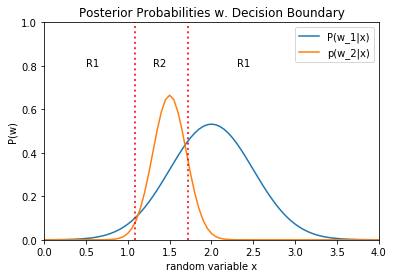

In [1]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt

def pdf(x, mu, sigma_sqr):
    """
    Calculates the normal distribution's probability density 
    function (PDF).  
        
    """
    term1 = 1.0 / ( math.sqrt(2*np.pi * sigma_sqr))
    term2 = np.exp( (-1/2.0) * ( ((x-mu)**2 / sigma_sqr) ))
    return term1 * term2

# generating some sample data
x = np.arange(0, 50, 0.05)

def posterior(likelihood, prior):
    """
    Calculates the posterior probability (after Bayes Rule) without
    the scale factor p(x) (=evidence).  
        
    """
    return likelihood * prior

# probability density functions
posterior1 = posterior(pdf(x, mu=2, sigma_sqr=0.25), prior=2/3.0)
posterior2 = posterior(pdf(x, mu=1.5, sigma_sqr=0.04), prior=1/3.0)

# Class conditional densities (likelihoods)
plt.plot(x, posterior1)
plt.plot(x, posterior2)
plt.title('Posterior Probabilities w. Decision Boundary')
plt.ylabel('P(w)')
plt.xlabel('random variable x')
plt.legend(['P(w_1|x)', 'p(w_2|x)'], loc='upper right')
plt.ylim([0,1])
plt.xlim([0,4])
plt.axvline(1.08625, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.axvline(1.72328, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.annotate('R1', xy=(0.5, 0.8), xytext=(0.5, 0.8))
plt.annotate('R2', xy=(1.3, 0.8), xytext=(1.3, 0.8))
plt.annotate('R1', xy=(2.3, 0.8), xytext=(2.3, 0.8))
plt.show()

<p><a name="classify_rand"></a>
<br></p>

## Classifying some random example data

[<a href="#sections">back to top</a>] <br>

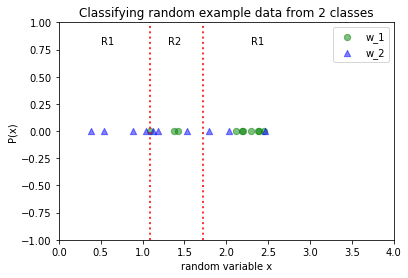

In [2]:
# Parameters
mu_1 = 2
mu_2 = 1.5
sigma_1_sqr = 0.25
sigma_2_sqr = 0.04

# Generating 10 random samples drawn from a Normal Distribution for class 1 & 2
x1_samples = sigma_1_sqr**0.5 * np.random.randn(10) + mu_1
x2_samples = sigma_1_sqr**0.5 * np.random.randn(10) + mu_2
y = [0 for i in range(10)]

# Plotting sample data with a decision boundary

plt.scatter(x1_samples, y, marker='o', color='green', s=40, alpha=0.5)
plt.scatter(x2_samples, y, marker='^', color='blue', s=40, alpha=0.5)
plt.title('Classifying random example data from 2 classes')
plt.ylabel('P(x)')
plt.xlabel('random variable x')
plt.legend(['w_1', 'w_2'], loc='upper right')
plt.ylim([-1,1])
plt.xlim([0,4])
plt.axvline(1.08625, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.axvline(1.72328, color='r', alpha=0.8, linestyle=':', linewidth=2)
plt.annotate('R1', xy=(0.5, 0.8), xytext=(0.5, 0.8))
plt.annotate('R2', xy=(1.3, 0.8), xytext=(1.3, 0.8))
plt.annotate('R1', xy=(2.3, 0.8), xytext=(2.3, 0.8))
plt.show()

<p><a name="emp_err"></a>
<br></p>

## Calculating the empirical error rate

[<a href="#sections">back to top</a>] <br>

In [3]:
w1_as_w2, w2_as_w1 = 0, 0
for x1,x2 in zip(x1_samples, x2_samples):
    if x1 > 1.08625 and x1 < 1.72328:
        w1_as_w2 += 1
    if x2 <= 1.08625 and x2 >= 1.72328:
        w2_as_w1 += 1
  
emp_err =  (w1_as_w2 + w2_as_w1) / float(len(x1_samples) + len(x2_samples))
    
print('Empirical Error: {}%'.format(emp_err * 100))

Empirical Error: 15.0%


In [ ]:
test complete; Gopal